<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
Author: Arina Lopukhova (@erynn). Edited by [Yury Kashnitskiy](https://yorko.github.io) (@yorko). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

<h1><center>Assignment #1. Fall 2018</center></h1>
<h2><center>Exploratory data analysis of Olympic games with Pandas</center></h2>

__There are ten questions about [120 years of Olympic history: athletes and results](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results/version/2) dataset in this task. Your task is to fill in the missing Python code and choose answers in [this web-form](https://docs.google.com/forms/d/179HYvlF_0x435CWdu2aOtR9a3flh0YCQXXNXhXaKw2M).__

Download the file `athlete_events.csv` from [Kaggle page](https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results). The dataset has the following features (copied from Kaggle):

- __ID__ - Unique number for each athlete
- __Name__ - Athlete's name
- __Sex__ - M or F
- __Age__ - Integer
- __Height__ - In centimeters
- __Weight__ - In kilograms
- __Team__ - Team name
- __NOC__ - National Olympic Committee 3-letter code
- __Games__ - Year and season
- __Year__ - Integer
- __Season__ - Summer or Winter
- __City__ - Host city
- __Sport__ - Sport
- __Event__ - Event
- __Medal__ - Gold, Silver, Bronze, or NA

In [1]:
import pandas as pd

In [2]:
# Change the path to the dataset file if needed. 
PATH = 'athlete_events.csv'

In [3]:
data = pd.read_csv(PATH)
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
data['Medal'].value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [7]:
data['Medal'].fillna('NA', inplace = True)

In [9]:
data['Medal'].value_counts().sum()

271116

__1. How old were the youngest male and female participants of the 1996 Olympics?__

- 16 and 15
- **14 and 12**
- 16 and 12
- 13 and 11

In [13]:
data[data['Year'] == 1996].groupby('Sex').min()

,ID,Name,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
Sex,,,,,,,,,,,,,,
F,13,Aa Bela Joaquim,12.0,136.0,30.0,Albania,ALB,1996 Summer,1996,Summer,Atlanta,Archery,Archery Women's Individual,Bronze
M,30,"A. J. Tyronne Benildus ""Benny"" Fernando",14.0,147.0,45.0,Afghanistan,AFG,1996 Summer,1996,Summer,Atlanta,Archery,Archery Men's Individual,Bronze


__2. What was the percentage of male gymnasts among all the male participants of the 2000 Olympics? Round the answer to the first decimal.__

*Hint:* here and further if needed drop duplicated sportsmen to count only unique ones. 

- 0.2
- **1.5** 
- 2.5
- **7.7**

In [21]:
df_2000_M = data[(data['Year'] == 2000) & (data['Sex']=='M')]
total_mens = len(df_2000_M)
gym_mens = len(df_2000_M[df_2000_M['Sport']=='Gymnastics'])

In [23]:
round((gym_mens/total_mens)*100,1)

7.7

In [33]:
# with drop_duplicates ()
df_2000_M_drop = data[(data['Year'] == 2000) & (data['Sex']=='M')].drop_duplicates(subset = 'Name')
total_mens = len(df_2000_M_drop)
gym_mens = len(df_2000_M_drop[df_2000_M_drop['Sport']=='Gymnastics'])

In [34]:
round((gym_mens/total_mens)*100,1)

1.5

__3. What are the mean and standard deviation of height for female basketball players participated in the 2000 Olympics? Round the answer to the first decimal.__

- 178.5 and 7.2
- 179.4 and 10
- 180.7 and 6.7
- **182.4 and 9.1** 

In [26]:
data[(data['Year']==2000) & (data['Sex'] == 'F') & (data['Sport'] == 'Basketball')]['Height'].describe()

count    142.000000
mean     182.387324
std        9.139462
min      162.000000
25%      175.000000
50%      182.000000
75%      190.000000
max      213.000000
Name: Height, dtype: float64

__4. Find a sportsperson participated in the 2002 Olympics, with the highest weight among other participants of the same Olympics. What sport did he or she do?__

- Judo
- **Bobsleigh** 
- Weightlifting
- Boxing

In [29]:
data[data['Year']==2002].sort_values(by = 'Weight', ascending =False).head(1)['Sport']

99154    Bobsleigh
Name: Sport, dtype: object

__5. How many times did Pawe Abratkiewicz participate in the Olympics held in different years?__

- 0
- 1 
- 2
- **3** 

In [32]:
data [data['Name'] == 'Pawe Abratkiewicz']['Year'].unique()

array([1992, 1998, 2002], dtype=int64)

__6. How many silver medals in tennis did Australia win at the 2000 Olympics?__

- 0
- 1 
- **2** 
- 3 

In [38]:
data[(data['Year']==2000) & (data['Sport']=='Tennis') & (data['Medal'] == 'Silver') & (data['NOC']=='AUS')]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
262820,131504,Todd Andrew Woodbridge,M,29.0,178.0,75.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Men's Doubles,Silver
262831,131511,Mark Raymond Woodforde,M,34.0,183.0,80.0,Australia,AUS,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Men's Doubles,Silver


__7. Is it true that Switzerland won fewer medals than Serbia at the 2016 Olympics? Do not consider NaN values in _Medal_ column.__ 

- **Yes** 
- No

In [43]:
medals = data[(data['Year'] == 2016) & (data['Medal'] != 'NA')].groupby('Team').count()['Medal']
print (medals['Switzerland'] < medals['Serbia'])

True


In [44]:
print (medals['Switzerland'])
print (medals['Serbia'])

11
54


__8. What age category did the fewest and the most participants of the 2014 Olympics belong to?__
- **[45-55] and [25-35) correspondingly**
- [45-55] and [15-25) correspondingly
- [35-45] and [25-35) correspondingly
- [45-55] and [35-45) correspondingly

In [74]:
# [45-55] and [25-35) correspondingly
ol_2014 = data[(data['Year'] == 2014)].drop_duplicates(subset='Name')
print ("[45-55]: " + str(ol_2014[(ol_2014['Age'] >= 45) & (ol_2014['Age'] <= 55) ].shape[0]))
print("[25-35): " + str(ol_2014[(ol_2014['Age'] >= 25) & (ol_2014['Age'] < 35) ].shape[0]))

[45-55]: 5
[25-35): 1396


In [75]:
#[45-55] and [15-25) correspondingly
print ("[45-55]: " + str(ol_2014[(ol_2014['Age'] >= 45) & (ol_2014['Age'] <= 55) ].shape[0]))
print("[15-25): " + str(ol_2014[(ol_2014['Age'] >= 15) & (ol_2014['Age'] < 25) ].shape[0]))

[45-55]: 5
[15-25): 1193


In [76]:
#[35-45] and [25-35) correspondingly
print ("[35-45]: " + str(ol_2014[(ol_2014['Age'] >= 35) & (ol_2014['Age'] <= 45) ].shape[0]))
print("[25-35): " + str(ol_2014[(ol_2014['Age'] >= 25) & (ol_2014['Age'] < 35) ].shape[0]))

[35-45]: 151
[25-35): 1396


In [77]:
#[35-45] and [25-35) correspondingly
print ("[45-55]: " + str(ol_2014[(ol_2014['Age'] >= 45) & (ol_2014['Age'] <= 55) ].shape[0]))
print("[35-45): " + str(ol_2014[(ol_2014['Age'] >= 35) & (ol_2014['Age'] < 45) ].shape[0]))

[45-55]: 5
[35-45): 150


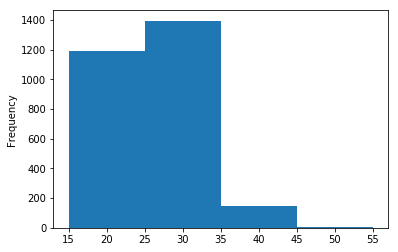

In [78]:
from matplotlib import pyplot as plt
%matplotlib inline
ol_2014['Age'].plot.hist(bins = 4)

__9. Is it true that there were Summer Olympics held in Lake Placid? Is it true that there were Winter Olympics held in Sankt Moritz?__

- Yes, Yes
- Yes, No
- **No, Yes** 
- No, No 

In [72]:
data[data['City'] == 'Lake Placid']['Season'].unique()

array(['Winter'], dtype=object)

In [73]:
data[data['City'] == 'Sankt Moritz']['Season'].unique()

array(['Winter'], dtype=object)

__10. What is the absolute difference between the number of unique sports at the 1995 Olympics and 2016 Olympics?__

- 16
- 24
- 26
- **34**

In [82]:
num_1995 = data[data['Year'] == 1995]['Sport'].nunique()
num_2016 = data[data['Year'] == 2016]['Sport'].nunique()

In [83]:
num_1995 - num_2016

-34